In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/chaitanya/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Loading the data

In [2]:
yolo_v3 = pd.read_csv("/home/chaitanya/Academics/3rd_Semester/DLRV/project/training_data/YOLOv3.csv")
yolo_v5n = pd.read_csv("/home/chaitanya/Academics/3rd_Semester/DLRV/project/training_data/YOLOv5n.csv")
yolo_v5s = pd.read_csv("/home/chaitanya/Academics/3rd_Semester/DLRV/project/training_data/YOLOv5s.csv")
yolo_v5m = pd.read_csv("/home/chaitanya/Academics/3rd_Semester/DLRV/project/training_data/YOLOv5m.csv")
yolo_v5l = pd.read_csv("/home/chaitanya/Academics/3rd_Semester/DLRV/project/training_data/YOLOv5l.csv")
yolo_v6n = pd.read_csv("/home/chaitanya/Academics/3rd_Semester/DLRV/project/training_data/YOLOv6n.csv")
yolo_v6s = pd.read_csv("/home/chaitanya/Academics/3rd_Semester/DLRV/project/training_data/YOLOv6s.csv")
yolo_v6m = pd.read_csv("/home/chaitanya/Academics/3rd_Semester/DLRV/project/training_data/YOLOv6m.csv")
yolo_v6l = pd.read_csv("/home/chaitanya/Academics/3rd_Semester/DLRV/project/training_data/YOLOv6l.csv")
yolo_v8n = pd.read_csv("/home/chaitanya/Academics/3rd_Semester/DLRV/project/training_data/YOLOv8n.csv")
yolo_v8s = pd.read_csv("/home/chaitanya/Academics/3rd_Semester/DLRV/project/training_data/YOLOv8s.csv")
yolo_v8m = pd.read_csv("/home/chaitanya/Academics/3rd_Semester/DLRV/project/training_data/YOLOv8m.csv")
yolo_v8l = pd.read_csv("/home/chaitanya/Academics/3rd_Semester/DLRV/project/training_data/YOLOv8l.csv")

### Calculating F1 score

In [3]:
def calculate_f1_score(precision_data, recall_data):
    return 2 * (precision_data * recall_data) / (precision_data + recall_data)

In [4]:
yolo_v3["f1_score"] = calculate_f1_score(yolo_v3["   metrics/precision(B)"], yolo_v3["      metrics/recall(B)"])
yolo_v5n["f1_score"] = calculate_f1_score(yolo_v5n["   metrics/precision(B)"], yolo_v5n["      metrics/recall(B)"])
yolo_v5s["f1_score"] = calculate_f1_score(yolo_v5s["   metrics/precision(B)"], yolo_v5s["      metrics/recall(B)"])
yolo_v5m["f1_score"] = calculate_f1_score(yolo_v5m["   metrics/precision(B)"], yolo_v5m["      metrics/recall(B)"])
yolo_v5l["f1_score"] = calculate_f1_score(yolo_v5l["   metrics/precision(B)"], yolo_v5l["      metrics/recall(B)"])
yolo_v6n["f1_score"] = calculate_f1_score(yolo_v6n["   metrics/precision(B)"], yolo_v6n["      metrics/recall(B)"])
yolo_v6s["f1_score"] = calculate_f1_score(yolo_v6s["   metrics/precision(B)"], yolo_v6s["      metrics/recall(B)"])
yolo_v6m["f1_score"] = calculate_f1_score(yolo_v6m["   metrics/precision(B)"], yolo_v6m["      metrics/recall(B)"])
yolo_v6l["f1_score"] = calculate_f1_score(yolo_v6l["   metrics/precision(B)"], yolo_v6l["      metrics/recall(B)"])
yolo_v8n["f1_score"] = calculate_f1_score(yolo_v8n["   metrics/precision(B)"], yolo_v8n["      metrics/recall(B)"])
yolo_v8s["f1_score"] = calculate_f1_score(yolo_v8s["   metrics/precision(B)"], yolo_v8s["      metrics/recall(B)"])
yolo_v8m["f1_score"] = calculate_f1_score(yolo_v8m["   metrics/precision(B)"], yolo_v8m["      metrics/recall(B)"])
yolo_v8l["f1_score"] = calculate_f1_score(yolo_v8l["   metrics/precision(B)"], yolo_v8l["      metrics/recall(B)"])

### Training times per epoch for all models

In [5]:
training_times = {
    "YOLOv3": 25,
    "YOLOv5n": 4,
    "YOLOv5s": 6,
    "YOLOv5m": 10,
    "YOLOv5l": 16,
    "YOLOv6n": 3,
    "YOLOv6s": 6,
    "YOLOv6m": 14,
    "YOLOv6l": 26,
    "YOLOv8n": 3,
    "YOLOv8s": 6,
    "YOLOv8m": 11,
    "YOLOv8l": 16
}

In [6]:
def get_number_of_epochs(data):
    return len(data)

In [7]:
def seconds_to_hms(seconds):
    """Convert seconds to HH:MM:SS format."""
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    secs = seconds % 60
    return f"{hours:02}:{minutes:02}:{secs:02}"

### Calculating the Total Training time for all models

In [8]:
def calculate_training_times():
    models = {
        "YOLOv3": yolo_v3,
        "YOLOv5n": yolo_v5n,
        "YOLOv5s": yolo_v5s,
        "YOLOv5m": yolo_v5m,
        "YOLOv5l": yolo_v5l,
        "YOLOv6n": yolo_v6n,
        "YOLOv6s": yolo_v6s,
        "YOLOv6m": yolo_v6m,
        "YOLOv6l": yolo_v6l,
        "YOLOv8n": yolo_v8n,
        "YOLOv8s": yolo_v8s,
        "YOLOv8m": yolo_v8m,
        "YOLOv8l": yolo_v8l
    }
    
    training_durations = {}
    
    for model_name, data in models.items():
        num_epochs = get_number_of_epochs(data)
        epoch_time = training_times.get(model_name, 0)
        total_training_time_seconds = num_epochs * epoch_time
        training_durations[model_name] = seconds_to_hms(total_training_time_seconds)
    
    return training_durations

In [9]:
training_durations = calculate_training_times()
print(training_durations)

{'YOLOv3': '02:29:10', 'YOLOv5n': '00:44:44', 'YOLOv5s': '00:44:36', 'YOLOv5m': '01:05:00', 'YOLOv5l': '01:38:08', 'YOLOv6n': '00:25:21', 'YOLOv6s': '00:40:36', 'YOLOv6m': '01:51:18', 'YOLOv6l': '03:35:22', 'YOLOv8n': '00:22:12', 'YOLOv8s': '00:42:48', 'YOLOv8m': '01:17:22', 'YOLOv8l': '01:47:44'}


### Finding out the best F1 score, Precision and Recall values during training

In [10]:
def get_best_f1_score_with_epoch(data):
    best_f1_score = data["f1_score"].max()
    best_epoch = data["f1_score"].idxmax()  
    return best_f1_score, best_epoch

def get_best_precision_with_epoch(data):
    best_precision = data["   metrics/precision(B)"].max()
    best_epoch = data["   metrics/precision(B)"].idxmax()
    return best_precision, best_epoch

def get_best_recall_with_epoch(data):
    best_recall = data["      metrics/recall(B)"].max()
    best_epoch = data["      metrics/recall(B)"].idxmax()
    return best_recall, best_epoch

In [11]:
yolo_v3_max_f1_score, yolo_v3_max_f1_score_epoch = get_best_f1_score_with_epoch(yolo_v3)
yolo_v5n_max_f1_score, yolo_v5n_max_f1_score_epoch = get_best_f1_score_with_epoch(yolo_v5n)
yolo_v5s_max_f1_score, yolo_v5s_max_f1_score_epoch = get_best_f1_score_with_epoch(yolo_v5s)
yolo_v5m_max_f1_score, yolo_v5m_max_f1_score_epoch = get_best_f1_score_with_epoch(yolo_v5m)
yolo_v5l_max_f1_score, yolo_v5l_max_f1_score_epoch = get_best_f1_score_with_epoch(yolo_v5l)
yolo_v6n_max_f1_score, yolo_v6n_max_f1_score_epoch = get_best_f1_score_with_epoch(yolo_v6n)
yolo_v6s_max_f1_score, yolo_v6s_max_f1_score_epoch = get_best_f1_score_with_epoch(yolo_v6s)
yolo_v6m_max_f1_score, yolo_v6m_max_f1_score_epoch = get_best_f1_score_with_epoch(yolo_v6m)
yolo_v6l_max_f1_score, yolo_v6l_max_f1_score_epoch = get_best_f1_score_with_epoch(yolo_v6l)
yolo_v8n_max_f1_score, yolo_v8n_max_f1_score_epoch = get_best_f1_score_with_epoch(yolo_v8n)
yolo_v8s_max_f1_score, yolo_v8s_max_f1_score_epoch = get_best_f1_score_with_epoch(yolo_v8s)
yolo_v8m_max_f1_score, yolo_v8m_max_f1_score_epoch = get_best_f1_score_with_epoch(yolo_v8m)
yolo_v8l_max_f1_score, yolo_v8l_max_f1_score_epoch = get_best_f1_score_with_epoch(yolo_v8l)

In [12]:
f1_scores = {
    "YOLOv3": [yolo_v3_max_f1_score, yolo_v3_max_f1_score_epoch], 
    "YOLOv5n": [yolo_v5n_max_f1_score, yolo_v5n_max_f1_score_epoch],
    "YOLOv5s": [yolo_v5s_max_f1_score, yolo_v5s_max_f1_score_epoch],
    "YOLOv5m": [yolo_v5m_max_f1_score, yolo_v5m_max_f1_score_epoch],
    "YOLOv5l": [yolo_v5l_max_f1_score, yolo_v5l_max_f1_score_epoch],
    "YOLOv6n": [yolo_v6n_max_f1_score, yolo_v6n_max_f1_score_epoch],
    "YOLOv6s": [yolo_v6s_max_f1_score, yolo_v6s_max_f1_score_epoch],
    "YOLOv6m": [yolo_v6m_max_f1_score, yolo_v6m_max_f1_score_epoch],
    "YOLOv6l": [yolo_v6l_max_f1_score, yolo_v6l_max_f1_score_epoch],
    "YOLOv8n": [yolo_v8n_max_f1_score, yolo_v8n_max_f1_score_epoch],
    "YOLOv8s": [yolo_v8s_max_f1_score, yolo_v8s_max_f1_score_epoch],
    "YOLOv8m": [yolo_v8m_max_f1_score, yolo_v8m_max_f1_score_epoch],
    "YOLOv8l": [yolo_v8l_max_f1_score, yolo_v8l_max_f1_score_epoch]
}
f1_scores

{'YOLOv3': [0.6568574542521705, 148],
 'YOLOv5n': [0.6698643546715769, 369],
 'YOLOv5s': [0.6701011302460527, 208],
 'YOLOv5m': [0.6538057729073307, 347],
 'YOLOv5l': [0.6602758819085607, 118],
 'YOLOv6n': [0.6680019754268869, 299],
 'YOLOv6s': [0.6660833876397334, 194],
 'YOLOv6m': [0.6485589537375326, 254],
 'YOLOv6l': [0.6527001419471412, 281],
 'YOLOv8n': [0.6607365135337606, 281],
 'YOLOv8s': [0.673646649830029, 249],
 'YOLOv8m': [0.6664255497382199, 195],
 'YOLOv8l': [0.6679624281045018, 212]}

In [13]:
yolo_v3_max_precision, yolo_v3_max_precision_epoch = get_best_precision_with_epoch(yolo_v3)
yolo_v5n_max_precision, yolo_v5n_max_precision_epoch = get_best_precision_with_epoch(yolo_v5n)
yolo_v5s_max_precision, yolo_v5s_max_precision_epoch = get_best_precision_with_epoch(yolo_v5s)
yolo_v5m_max_precision, yolo_v5m_max_precision_epoch = get_best_precision_with_epoch(yolo_v5m)
yolo_v5l_max_precision, yolo_v5l_max_precision_epoch = get_best_precision_with_epoch(yolo_v5l)
yolo_v6n_max_precision, yolo_v6n_max_precision_epoch = get_best_precision_with_epoch(yolo_v6n)
yolo_v6s_max_precision, yolo_v6s_max_precision_epoch = get_best_precision_with_epoch(yolo_v6s)
yolo_v6m_max_precision, yolo_v6m_max_precision_epoch = get_best_precision_with_epoch(yolo_v6m)
yolo_v6l_max_precision, yolo_v6l_max_precision_epoch = get_best_precision_with_epoch(yolo_v6l)
yolo_v8n_max_precision, yolo_v8n_max_precision_epoch = get_best_precision_with_epoch(yolo_v8n)
yolo_v8s_max_precision, yolo_v8s_max_precision_epoch = get_best_precision_with_epoch(yolo_v8s)
yolo_v8m_max_precision, yolo_v8m_max_precision_epoch = get_best_precision_with_epoch(yolo_v8m)
yolo_v8l_max_precision, yolo_v8l_max_precision_epoch = get_best_precision_with_epoch(yolo_v8l)

In [14]:
precision = {
    "YOLOv3": [yolo_v3_max_precision, yolo_v3_max_precision_epoch],
    "YOLOv5n": [yolo_v5n_max_precision, yolo_v5n_max_precision_epoch],
    "YOLOv5s": [yolo_v5s_max_precision, yolo_v5s_max_precision_epoch],
    "YOLOv5m": [yolo_v5m_max_precision, yolo_v5m_max_precision_epoch],
    "YOLOv5l": [yolo_v5l_max_precision, yolo_v5l_max_precision_epoch],
    "YOLOv6n": [yolo_v6n_max_precision, yolo_v6n_max_precision_epoch],
    "YOLOv6s": [yolo_v6s_max_precision, yolo_v6s_max_precision_epoch],
    "YOLOv6m": [yolo_v6m_max_precision, yolo_v6m_max_precision_epoch],
    "YOLOv6l": [yolo_v6l_max_precision, yolo_v6l_max_precision_epoch],
    "YOLOv8n": [yolo_v8n_max_precision, yolo_v8n_max_precision_epoch],
    "YOLOv8s": [yolo_v8s_max_precision, yolo_v8s_max_precision_epoch],
    "YOLOv8m": [yolo_v8m_max_precision, yolo_v8m_max_precision_epoch],
    "YOLOv8l": [yolo_v8l_max_precision, yolo_v8l_max_precision_epoch]
}
precision

{'YOLOv3': [0.71331, 114],
 'YOLOv5n': [0.72167, 465],
 'YOLOv5s': [0.71816, 211],
 'YOLOv5m': [0.70526, 271],
 'YOLOv5l': [0.72194, 342],
 'YOLOv6n': [0.69191, 474],
 'YOLOv6s': [0.70809, 368],
 'YOLOv6m': [0.70189, 211],
 'YOLOv6l': [0.70325, 317],
 'YOLOv8n': [0.70111, 438],
 'YOLOv8s': [0.71461, 367],
 'YOLOv8m': [0.7195, 194],
 'YOLOv8l': [0.72535, 91]}

In [15]:
yolo_v3_max_recall, yolo_v3_max_recall_epoch = get_best_recall_with_epoch(yolo_v3)
yolo_v5n_max_recall, yolo_v5n_max_recall_epoch = get_best_recall_with_epoch(yolo_v5n)
yolo_v5s_max_recall, yolo_v5s_max_recall_epoch = get_best_recall_with_epoch(yolo_v5s)
yolo_v5m_max_recall, yolo_v5m_max_recall_epoch = get_best_recall_with_epoch(yolo_v5m)
yolo_v5l_max_recall, yolo_v5l_max_recall_epoch = get_best_recall_with_epoch(yolo_v5l)
yolo_v6n_max_recall, yolo_v6n_max_recall_epoch = get_best_recall_with_epoch(yolo_v6n)
yolo_v6s_max_recall, yolo_v6s_max_recall_epoch = get_best_recall_with_epoch(yolo_v6s)
yolo_v6m_max_recall, yolo_v6m_max_recall_epoch = get_best_recall_with_epoch(yolo_v6m)
yolo_v6l_max_recall, yolo_v6l_max_recall_epoch = get_best_recall_with_epoch(yolo_v6l)
yolo_v8n_max_recall, yolo_v8n_max_recall_epoch = get_best_recall_with_epoch(yolo_v8n)
yolo_v8s_max_recall, yolo_v8s_max_recall_epoch = get_best_recall_with_epoch(yolo_v8s)
yolo_v8m_max_recall, yolo_v8m_max_recall_epoch = get_best_recall_with_epoch(yolo_v8m)
yolo_v8l_max_recall, yolo_v8l_max_recall_epoch = get_best_recall_with_epoch(yolo_v8l)

In [16]:
recall = {
    "YOLOv3": [yolo_v3_max_recall, yolo_v3_max_recall_epoch],
    "YOLOv5n": [yolo_v5n_max_recall, yolo_v5n_max_recall_epoch],
    "YOLOv5s": [yolo_v5s_max_recall, yolo_v5s_max_recall_epoch],
    "YOLOv5m": [yolo_v5m_max_recall, yolo_v5m_max_recall_epoch],
    "YOLOv5l": [yolo_v5l_max_recall, yolo_v5l_max_recall_epoch],
    "YOLOv6n": [yolo_v6n_max_recall, yolo_v6n_max_recall_epoch],
    "YOLOv6s": [yolo_v6s_max_recall, yolo_v6s_max_recall_epoch],
    "YOLOv6m": [yolo_v6m_max_recall, yolo_v6m_max_recall_epoch],
    "YOLOv6l": [yolo_v6l_max_recall, yolo_v6l_max_recall_epoch],
    "YOLOv8n": [yolo_v8n_max_recall, yolo_v8n_max_recall_epoch],
    "YOLOv8s": [yolo_v8s_max_recall, yolo_v8s_max_recall_epoch],
    "YOLOv8m": [yolo_v8m_max_recall, yolo_v8m_max_recall_epoch],
    "YOLOv8l": [yolo_v8l_max_recall, yolo_v8l_max_recall_epoch]
}
recall

{'YOLOv3': [0.66694, 320],
 'YOLOv5n': [0.68609, 329],
 'YOLOv5s': [0.66611, 200],
 'YOLOv5m': [0.67263, 127],
 'YOLOv5l': [0.66445, 168],
 'YOLOv6n': [0.68193, 433],
 'YOLOv6s': [0.6859, 266],
 'YOLOv6m': [0.65779, 357],
 'YOLOv6l': [0.67343, 346],
 'YOLOv8n': [0.68443, 221],
 'YOLOv8s': [0.69276, 338],
 'YOLOv8m': [0.67954, 228],
 'YOLOv8l': [0.68119, 321]}

### Plotting the graph Epochs vs F1 Score

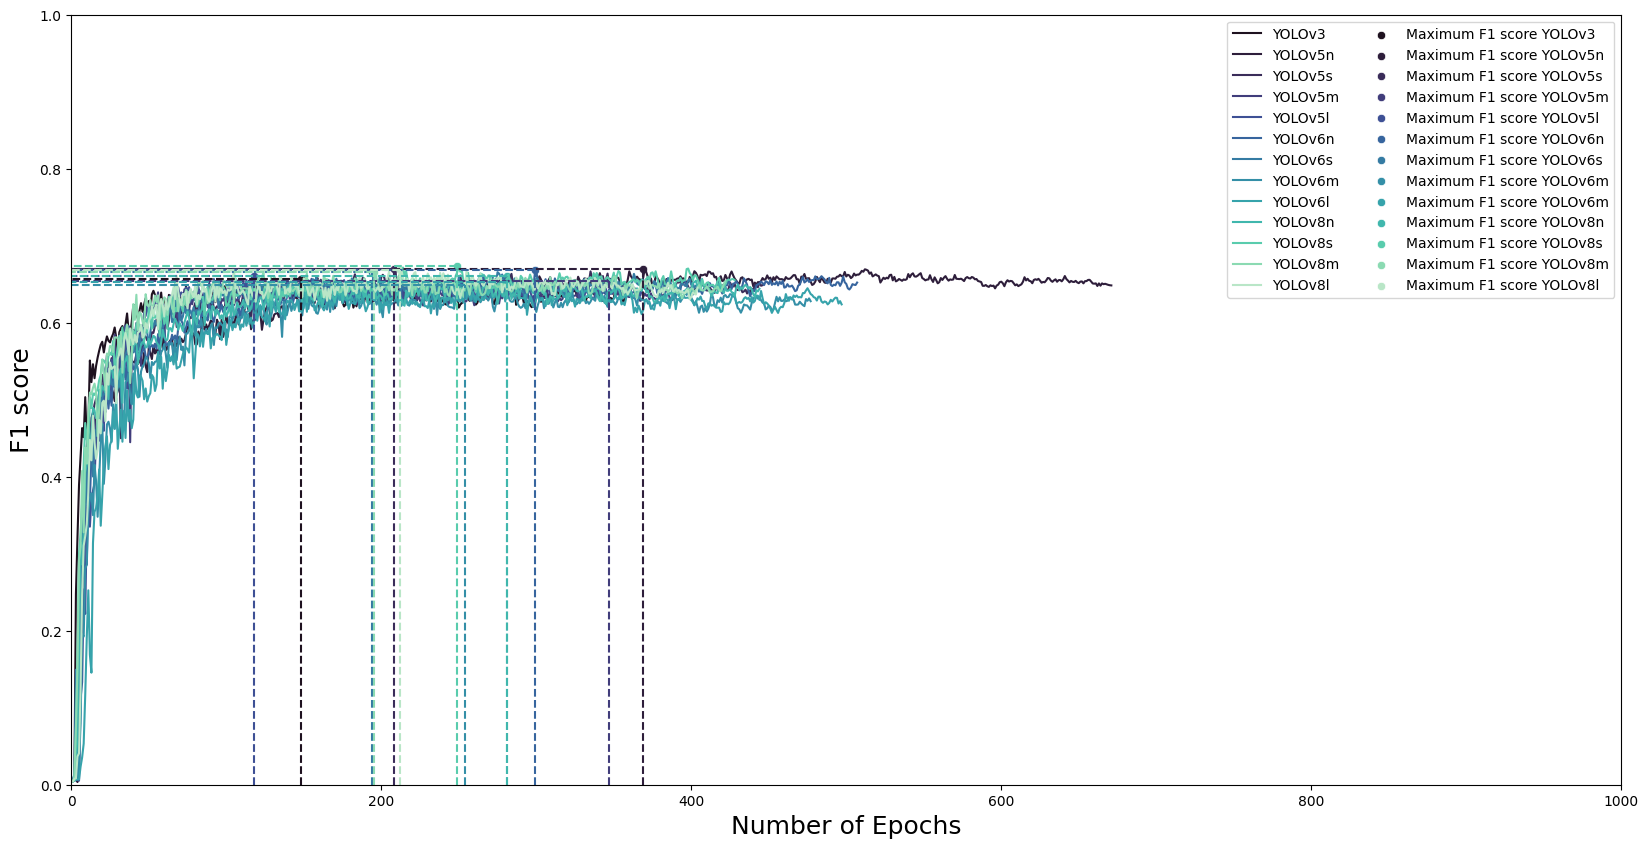

In [17]:
plt.figure(figsize=(20, 10))
colors = sns.color_palette("mako", 13)

sns.lineplot(x=yolo_v3['                  epoch'], y=yolo_v3['f1_score'], label='YOLOv3', color=colors[0])
sns.lineplot(x=yolo_v5n['                  epoch'], y=yolo_v5n['f1_score'], label='YOLOv5n', color=colors[1])
sns.lineplot(x=yolo_v5s['                  epoch'], y=yolo_v5s['f1_score'], label='YOLOv5s', color=colors[2])
sns.lineplot(x=yolo_v5m['                  epoch'], y=yolo_v5m['f1_score'], label='YOLOv5m', color=colors[3])
sns.lineplot(x=yolo_v5l['                  epoch'], y=yolo_v5l['f1_score'], label='YOLOv5l', color=colors[4])
sns.lineplot(x=yolo_v6n['                  epoch'], y=yolo_v6n['f1_score'], label='YOLOv6n', color=colors[5])
sns.lineplot(x=yolo_v6s['                  epoch'], y=yolo_v6s['f1_score'], label='YOLOv6s', color=colors[6])
sns.lineplot(x=yolo_v6m['                  epoch'], y=yolo_v6m['f1_score'], label='YOLOv6m', color=colors[7])
sns.lineplot(x=yolo_v6l['                  epoch'], y=yolo_v6l["f1_score"], label='YOLOv6l', color=colors[8])
sns.lineplot(x=yolo_v8n['                  epoch'], y=yolo_v8n['f1_score'], label='YOLOv8n', color=colors[9])
sns.lineplot(x=yolo_v8s['                  epoch'], y=yolo_v8s['f1_score'], label='YOLOv8s', color=colors[10])
sns.lineplot(x=yolo_v8m['                  epoch'], y=yolo_v8m['f1_score'], label='YOLOv8m', color=colors[11])
sns.lineplot(x=yolo_v8l['                  epoch'], y=yolo_v8l['f1_score'], label='YOLOv8l', color=colors[12])

sns.scatterplot(x=[yolo_v3_max_f1_score_epoch], y=[yolo_v3_max_f1_score], color=colors[0], label='Maximum F1 score YOLOv3')
sns.scatterplot(x=[yolo_v5n_max_f1_score_epoch], y=[yolo_v5n_max_f1_score], color=colors[1], label='Maximum F1 score YOLOv5n')
sns.scatterplot(x=[yolo_v5s_max_f1_score_epoch], y=[yolo_v5s_max_f1_score], color=colors[2], label='Maximum F1 score YOLOv5s')
sns.scatterplot(x=[yolo_v5m_max_f1_score_epoch], y=[yolo_v5m_max_f1_score], color=colors[3], label='Maximum F1 score YOLOv5m')
sns.scatterplot(x=[yolo_v5l_max_f1_score_epoch], y=[yolo_v5l_max_f1_score], color=colors[4], label='Maximum F1 score YOLOv5l')
sns.scatterplot(x=[yolo_v6n_max_f1_score_epoch], y=[yolo_v6n_max_f1_score], color=colors[5], label='Maximum F1 score YOLOv6n')
sns.scatterplot(x=[yolo_v6s_max_f1_score_epoch], y=[yolo_v6s_max_f1_score], color=colors[6], label='Maximum F1 score YOLOv6s')
sns.scatterplot(x=[yolo_v6m_max_f1_score_epoch], y=[yolo_v6m_max_f1_score], color=colors[7], label='Maximum F1 score YOLOv6m')
sns.scatterplot(x=[yolo_v6l_max_f1_score_epoch], y=[yolo_v6l_max_f1_score], color=colors[8], label='Maximum F1 score YOLOv6m')
sns.scatterplot(x=[yolo_v8n_max_f1_score_epoch], y=[yolo_v8n_max_f1_score], color=colors[9], label='Maximum F1 score YOLOv8n')
sns.scatterplot(x=[yolo_v8s_max_f1_score_epoch], y=[yolo_v8s_max_f1_score], color=colors[10], label='Maximum F1 score YOLOv8s')
sns.scatterplot(x=[yolo_v8m_max_f1_score_epoch], y=[yolo_v8m_max_f1_score], color=colors[11], label='Maximum F1 score YOLOv8m')
sns.scatterplot(x=[yolo_v8l_max_f1_score_epoch], y=[yolo_v8l_max_f1_score], color=colors[12], label='Maximum F1 score YOLOv8l')

for color, epoch, f1_score in zip(colors, 
                                  [yolo_v3_max_f1_score_epoch, yolo_v5n_max_f1_score_epoch, yolo_v5s_max_f1_score_epoch, yolo_v5m_max_f1_score_epoch,
                                   yolo_v5l_max_f1_score_epoch, yolo_v6n_max_f1_score_epoch, yolo_v6s_max_f1_score_epoch, yolo_v6m_max_f1_score_epoch,
                                   yolo_v6l_max_f1_score_epoch, yolo_v8n_max_f1_score_epoch, yolo_v8s_max_f1_score_epoch, yolo_v8m_max_f1_score_epoch, 
                                   yolo_v8l_max_f1_score_epoch], 
                                  [yolo_v3_max_f1_score, yolo_v5n_max_f1_score, yolo_v5s_max_f1_score, yolo_v5m_max_f1_score, yolo_v5l_max_f1_score,
                                   yolo_v6n_max_f1_score, yolo_v6s_max_f1_score, yolo_v6m_max_f1_score, yolo_v6l_max_f1_score, yolo_v8n_max_f1_score, 
                                   yolo_v8s_max_f1_score, yolo_v8m_max_f1_score, yolo_v8l_max_f1_score]):
    plt.plot([epoch, epoch], [0, f1_score], color=color, linestyle='dashed')
    plt.plot([epoch, f1_score], [f1_score, f1_score], color=color, linestyle='dashed')

plt.legend(ncol=2, loc='upper right')
plt.xlim(0, 1000)
plt.ylim(0, 1)
plt.xlabel("Number of Epochs", fontsize=18)
plt.ylabel("F1 score", fontsize=18)
# plt.savefig("f1_score_vs_epochs.pdf")
plt.show()


### Plotting the graph Epochs vs Precision

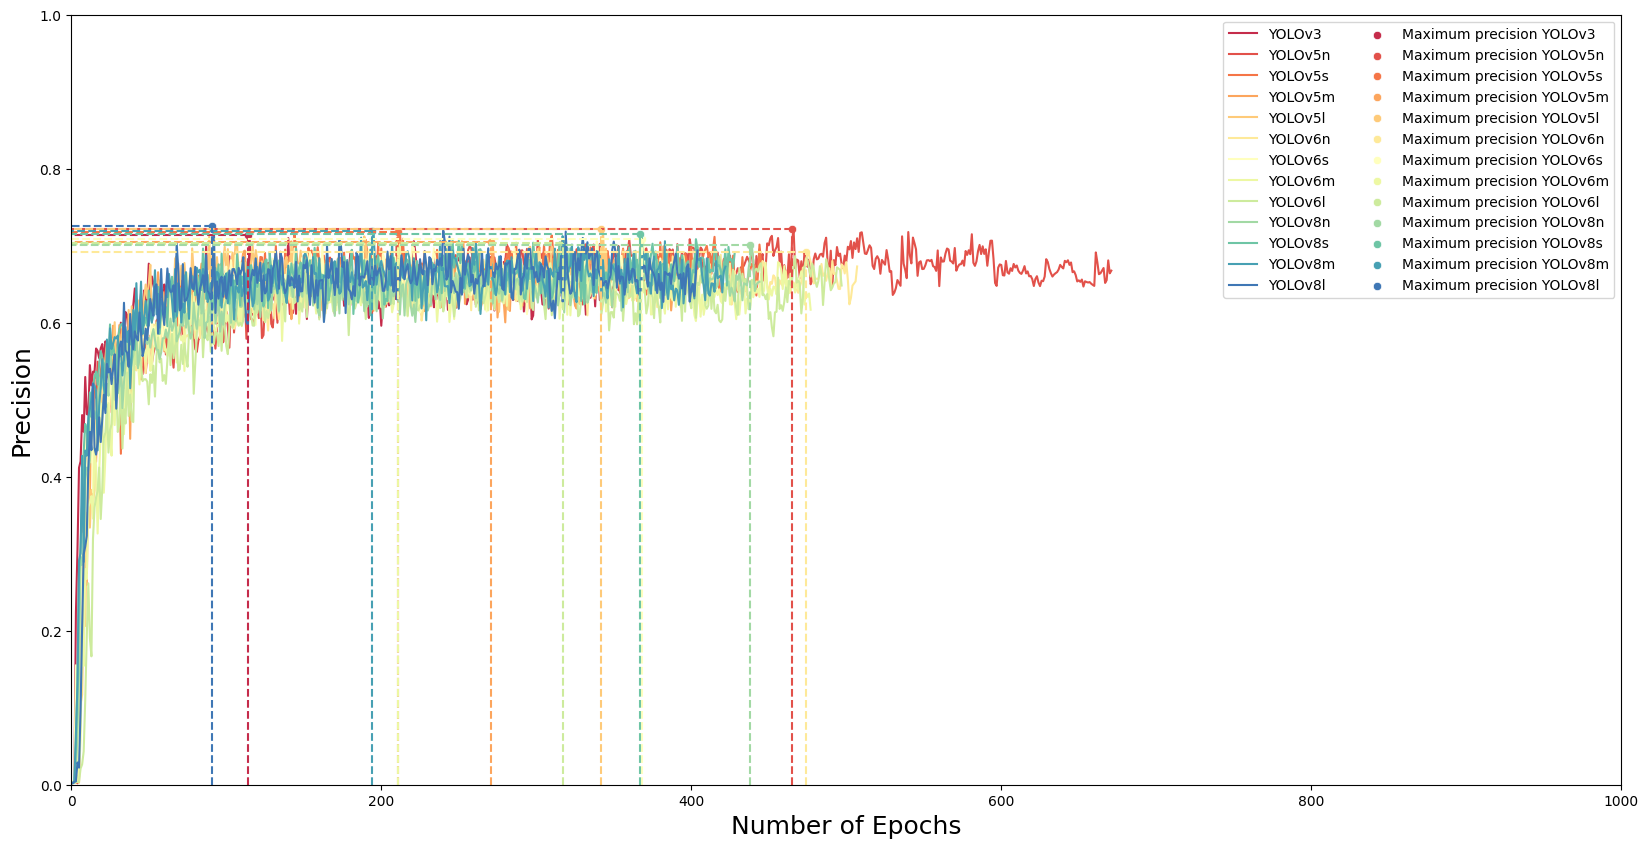

In [18]:
plt.figure(figsize=(20, 10))
colors = sns.color_palette("Spectral", 13)

sns.lineplot(x=yolo_v3['                  epoch'], y=yolo_v3['   metrics/precision(B)'], label='YOLOv3', color=colors[0])
sns.lineplot(x=yolo_v5n['                  epoch'], y=yolo_v5n['   metrics/precision(B)'], label='YOLOv5n', color=colors[1])
sns.lineplot(x=yolo_v5s['                  epoch'], y=yolo_v5s['   metrics/precision(B)'], label='YOLOv5s', color=colors[2])
sns.lineplot(x=yolo_v5m['                  epoch'], y=yolo_v5m['   metrics/precision(B)'], label='YOLOv5m', color=colors[3])
sns.lineplot(x=yolo_v5l['                  epoch'], y=yolo_v5l['   metrics/precision(B)'], label='YOLOv5l', color=colors[4])
sns.lineplot(x=yolo_v6n['                  epoch'], y=yolo_v6n['   metrics/precision(B)'], label='YOLOv6n', color=colors[5])
sns.lineplot(x=yolo_v6s['                  epoch'], y=yolo_v6s['   metrics/precision(B)'], label='YOLOv6s', color=colors[6])
sns.lineplot(x=yolo_v6m['                  epoch'], y=yolo_v6m['   metrics/precision(B)'], label='YOLOv6m', color=colors[7])
sns.lineplot(x=yolo_v6l['                  epoch'], y=yolo_v6l['   metrics/precision(B)'], label='YOLOv6l', color=colors[8])
sns.lineplot(x=yolo_v8n['                  epoch'], y=yolo_v8n['   metrics/precision(B)'], label='YOLOv8n', color=colors[9])
sns.lineplot(x=yolo_v8s['                  epoch'], y=yolo_v8s['   metrics/precision(B)'], label='YOLOv8s', color=colors[10])
sns.lineplot(x=yolo_v8m['                  epoch'], y=yolo_v8m['   metrics/precision(B)'], label='YOLOv8m', color=colors[11])
sns.lineplot(x=yolo_v8l['                  epoch'], y=yolo_v8l['   metrics/precision(B)'], label='YOLOv8l', color=colors[12])

sns.scatterplot(x=[yolo_v3_max_precision_epoch], y=[yolo_v3_max_precision], color=colors[0], label='Maximum precision YOLOv3')
sns.scatterplot(x=[yolo_v5n_max_precision_epoch], y=[yolo_v5n_max_precision], color=colors[1], label='Maximum precision YOLOv5n')
sns.scatterplot(x=[yolo_v5s_max_precision_epoch], y=[yolo_v5s_max_precision], color=colors[2], label='Maximum precision YOLOv5s')
sns.scatterplot(x=[yolo_v5m_max_precision_epoch], y=[yolo_v5m_max_precision], color=colors[3], label='Maximum precision YOLOv5m')
sns.scatterplot(x=[yolo_v5l_max_precision_epoch], y=[yolo_v5l_max_precision], color=colors[4], label='Maximum precision YOLOv5l')
sns.scatterplot(x=[yolo_v6n_max_precision_epoch], y=[yolo_v6n_max_precision], color=colors[5], label='Maximum precision YOLOv6n')
sns.scatterplot(x=[yolo_v6s_max_precision_epoch], y=[yolo_v6s_max_precision], color=colors[6], label='Maximum precision YOLOv6s')
sns.scatterplot(x=[yolo_v6m_max_precision_epoch], y=[yolo_v6m_max_precision], color=colors[7], label='Maximum precision YOLOv6m')
sns.scatterplot(x=[yolo_v6l_max_precision_epoch], y=[yolo_v6l_max_precision], color=colors[8], label='Maximum precision YOLOv6l')
sns.scatterplot(x=[yolo_v8n_max_precision_epoch], y=[yolo_v8n_max_precision], color=colors[9], label='Maximum precision YOLOv8n')
sns.scatterplot(x=[yolo_v8s_max_precision_epoch], y=[yolo_v8s_max_precision], color=colors[10], label='Maximum precision YOLOv8s')
sns.scatterplot(x=[yolo_v8m_max_precision_epoch], y=[yolo_v8m_max_precision], color=colors[11], label='Maximum precision YOLOv8m')
sns.scatterplot(x=[yolo_v8l_max_precision_epoch], y=[yolo_v8l_max_precision], color=colors[12], label='Maximum precision YOLOv8l')

for color, epoch, precision in zip(colors,
                                   [yolo_v3_max_precision_epoch, yolo_v5n_max_precision_epoch, yolo_v5s_max_precision_epoch, yolo_v5m_max_precision_epoch, 
                                    yolo_v5l_max_precision_epoch, yolo_v6n_max_precision_epoch, yolo_v6s_max_precision_epoch, yolo_v6m_max_precision_epoch, 
                                    yolo_v6l_max_precision_epoch, yolo_v8n_max_precision_epoch, yolo_v8s_max_precision_epoch, yolo_v8m_max_precision_epoch, 
                                    yolo_v8l_max_precision_epoch], 
                                   [yolo_v3_max_precision, yolo_v5n_max_precision, yolo_v5s_max_precision, yolo_v5m_max_precision, yolo_v5l_max_precision, 
                                    yolo_v6n_max_precision, yolo_v6s_max_precision, yolo_v6m_max_precision, yolo_v6l_max_precision,  yolo_v8n_max_precision, 
                                    yolo_v8s_max_precision, yolo_v8m_max_precision, yolo_v8l_max_precision]):
    plt.plot([epoch, epoch], [0, precision], color=color, linestyle='dashed')
    plt.plot([epoch, precision], [precision, precision], color=color, linestyle='dashed')

plt.legend(ncol=2, loc='upper right')
plt.xlim(0, 1000)
plt.ylim(0, 1)
plt.xlabel("Number of Epochs", fontsize=18)
plt.ylabel("Precision", fontsize=18)
# plt.savefig("precision_vs_epochs.pdf")
plt.show()


### Plotting the graph Epochs vs Recall

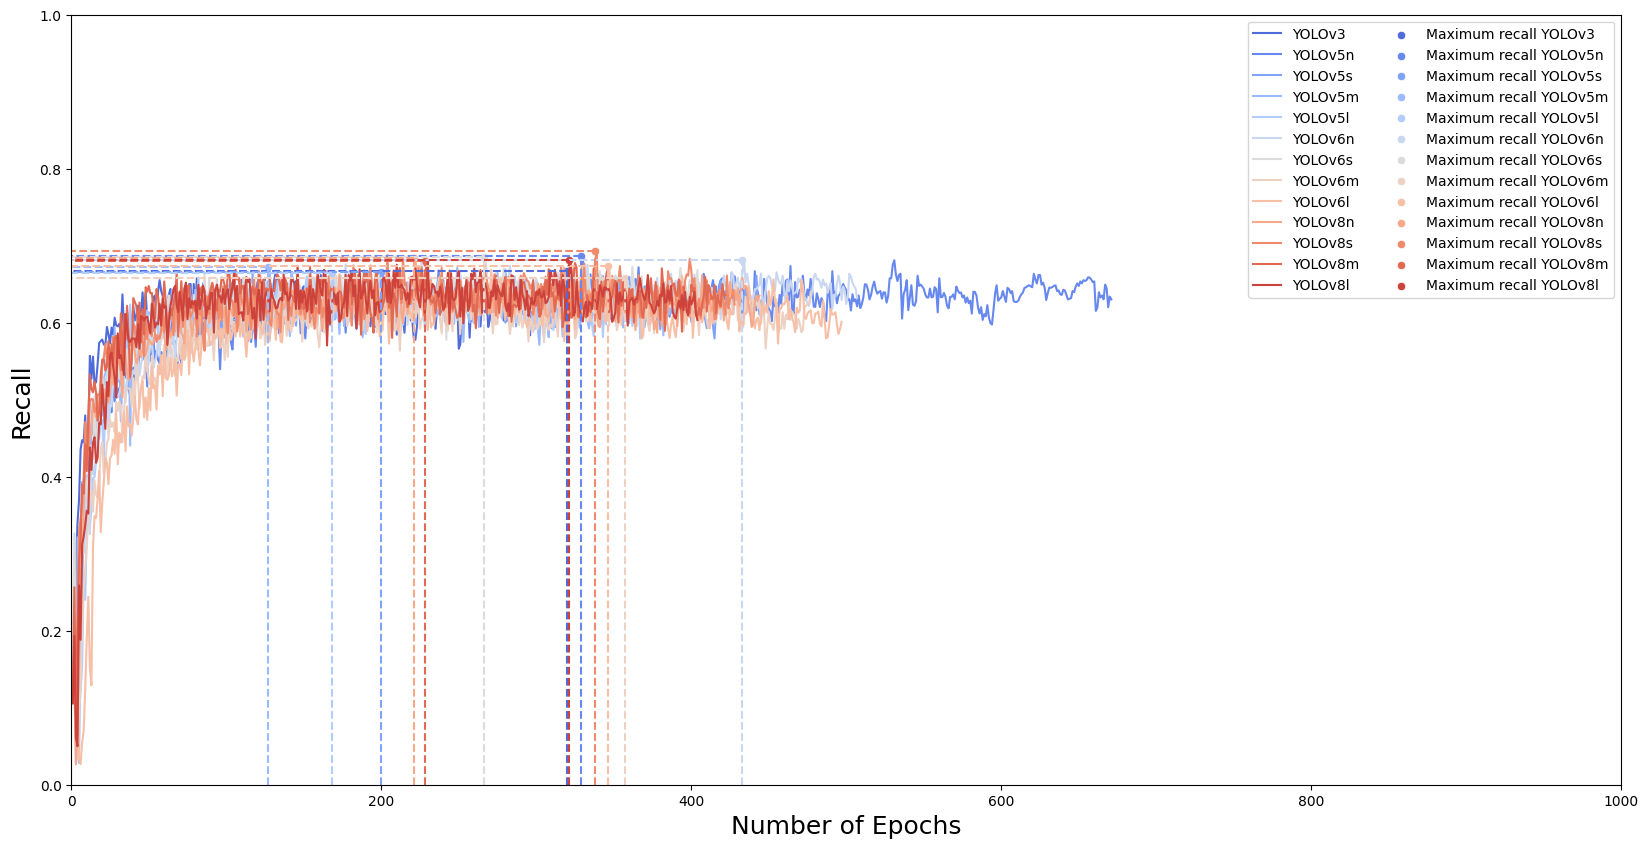

In [19]:
plt.figure(figsize=(20, 10))
colors = sns.color_palette("coolwarm", 13)

sns.lineplot(x="                  epoch", y="      metrics/recall(B)", data=yolo_v3, color=colors[0], label="YOLOv3")
sns.lineplot(x="                  epoch", y="      metrics/recall(B)", data=yolo_v5n, color=colors[1], label="YOLOv5n")
sns.lineplot(x="                  epoch", y="      metrics/recall(B)", data=yolo_v5s, color=colors[2], label="YOLOv5s")
sns.lineplot(x="                  epoch", y="      metrics/recall(B)", data=yolo_v5m, color=colors[3], label="YOLOv5m")
sns.lineplot(x="                  epoch", y="      metrics/recall(B)", data=yolo_v5l, color=colors[4], label="YOLOv5l")
sns.lineplot(x="                  epoch", y="      metrics/recall(B)", data=yolo_v6n, color=colors[5], label="YOLOv6n")
sns.lineplot(x="                  epoch", y="      metrics/recall(B)", data=yolo_v6s, color=colors[6], label="YOLOv6s")
sns.lineplot(x="                  epoch", y="      metrics/recall(B)", data=yolo_v6m, color=colors[7], label="YOLOv6m")
sns.lineplot(x="                  epoch", y="      metrics/recall(B)", data=yolo_v6l, color=colors[8], label="YOLOv6l")
sns.lineplot(x="                  epoch", y="      metrics/recall(B)", data=yolo_v8n, color=colors[9], label="YOLOv8n")
sns.lineplot(x="                  epoch", y="      metrics/recall(B)", data=yolo_v8s, color=colors[10], label="YOLOv8s")
sns.lineplot(x="                  epoch", y="      metrics/recall(B)", data=yolo_v8m, color=colors[11], label="YOLOv8m")
sns.lineplot(x="                  epoch", y="      metrics/recall(B)", data=yolo_v8l, color=colors[12], label="YOLOv8l")

sns.scatterplot(x=[yolo_v3_max_recall_epoch], y=[yolo_v3_max_recall], color=colors[0], label="Maximum recall YOLOv3")
sns.scatterplot(x=[yolo_v5n_max_recall_epoch], y=[yolo_v5n_max_recall], color=colors[1], label="Maximum recall YOLOv5n")
sns.scatterplot(x=[yolo_v5s_max_recall_epoch], y=[yolo_v5s_max_recall], color=colors[2], label="Maximum recall YOLOv5s")
sns.scatterplot(x=[yolo_v5m_max_recall_epoch], y=[yolo_v5m_max_recall], color=colors[3], label="Maximum recall YOLOv5m")
sns.scatterplot(x=[yolo_v5l_max_recall_epoch], y=[yolo_v5l_max_recall], color=colors[4], label="Maximum recall YOLOv5l")
sns.scatterplot(x=[yolo_v6n_max_recall_epoch], y=[yolo_v6n_max_recall], color=colors[5], label="Maximum recall YOLOv6n")
sns.scatterplot(x=[yolo_v6s_max_recall_epoch], y=[yolo_v6s_max_recall], color=colors[6], label="Maximum recall YOLOv6s")
sns.scatterplot(x=[yolo_v6m_max_recall_epoch], y=[yolo_v6m_max_recall], color=colors[7], label="Maximum recall YOLOv6m")
sns.scatterplot(x=[yolo_v6l_max_recall_epoch], y=[yolo_v6l_max_recall], color=colors[8], label="Maximum recall YOLOv6l")
sns.scatterplot(x=[yolo_v8n_max_recall_epoch], y=[yolo_v8n_max_recall], color=colors[9], label="Maximum recall YOLOv8n")
sns.scatterplot(x=[yolo_v8s_max_recall_epoch], y=[yolo_v8s_max_recall], color=colors[10], label="Maximum recall YOLOv8s")
sns.scatterplot(x=[yolo_v8m_max_recall_epoch], y=[yolo_v8m_max_recall], color=colors[11], label="Maximum recall YOLOv8m")
sns.scatterplot(x=[yolo_v8l_max_recall_epoch], y=[yolo_v8l_max_recall], color=colors[12], label="Maximum recall YOLOv8l")


for color, epoch, recall in zip(colors,
                                [yolo_v3_max_recall_epoch, yolo_v5n_max_recall_epoch, yolo_v5s_max_recall_epoch, yolo_v5m_max_recall_epoch, 
                                 yolo_v5l_max_recall_epoch, yolo_v6n_max_recall_epoch, yolo_v6s_max_recall_epoch, yolo_v6m_max_recall_epoch, 
                                 yolo_v6l_max_recall_epoch, yolo_v8n_max_recall_epoch, yolo_v8s_max_recall_epoch, yolo_v8m_max_recall_epoch, 
                                 yolo_v8l_max_recall_epoch],
                                [yolo_v3_max_recall, yolo_v5n_max_recall, yolo_v5s_max_recall, yolo_v5m_max_recall, yolo_v5l_max_recall, yolo_v6n_max_recall, 
                                 yolo_v6s_max_recall, yolo_v6m_max_recall, yolo_v6l_max_recall, yolo_v8n_max_recall,  yolo_v8s_max_recall, yolo_v8m_max_recall,
                                 yolo_v8l_max_recall]):
    plt.plot([epoch, epoch], [0, recall], color=color, linestyle='dashed')
    plt.plot([epoch, recall], [recall, recall], color=color, linestyle='dashed')
    
plt.legend(ncol=2, loc='upper right')
plt.xlim(0, 1000)
plt.ylim(0, 1)
plt.xlabel("Number of Epochs", fontsize=18)
plt.ylabel("Recall", fontsize=18)
# plt.savefig("recall_vs_epochs.pdf")
plt.show()

### Plotting the graph Epochs vs Box Loss

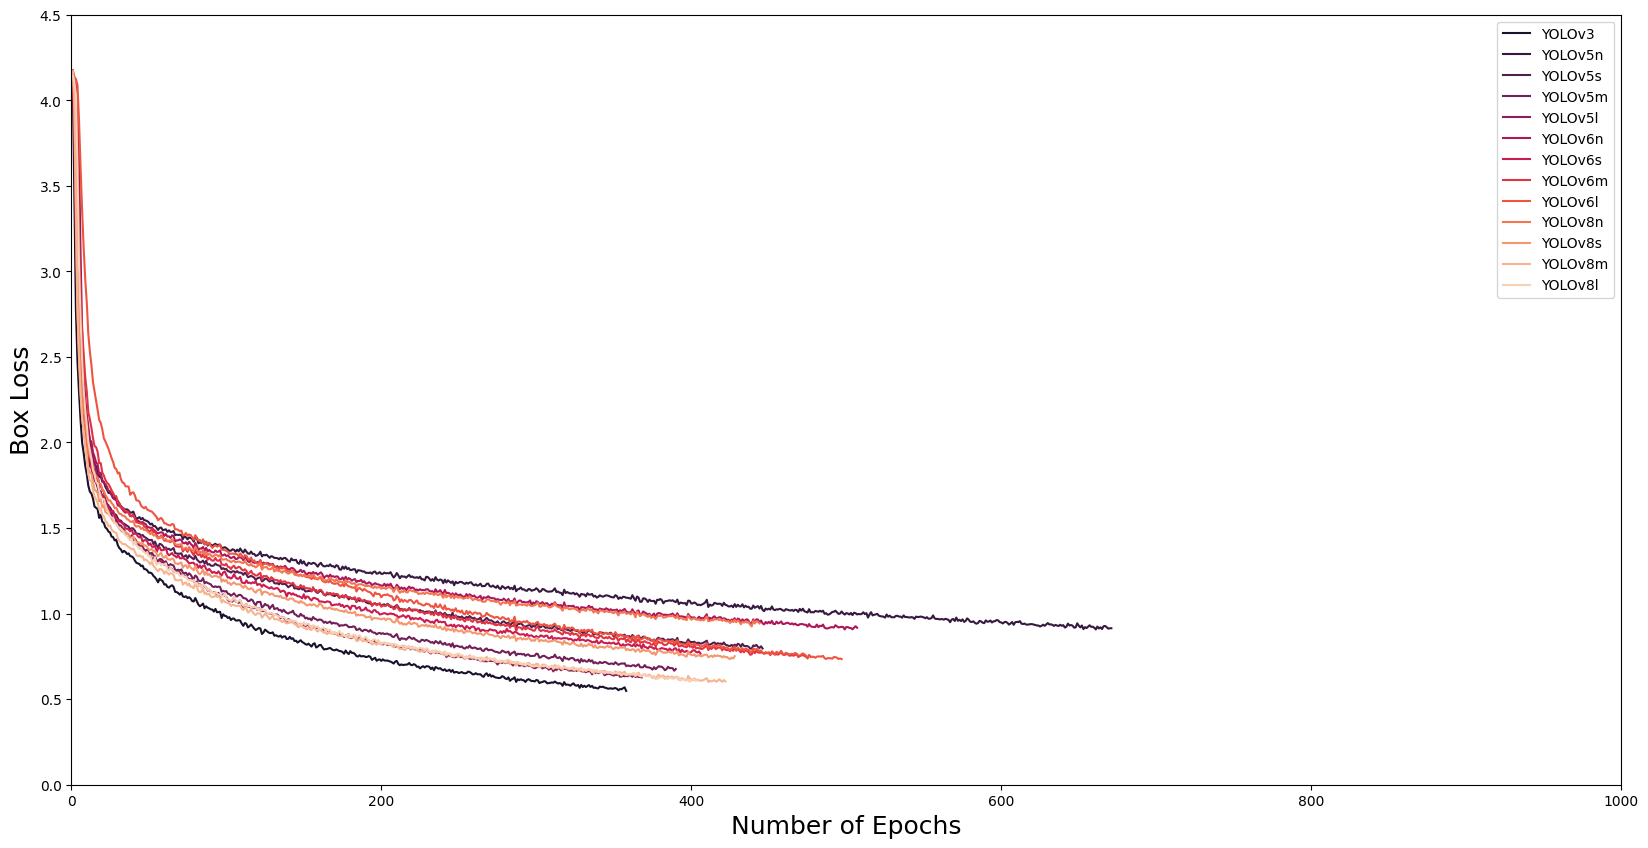

In [20]:
plt.figure(figsize=(20, 10))
colors = sns.color_palette('rocket', 13)

sns.lineplot(x="                  epoch", y="         train/box_loss", data=yolo_v3, color=colors[0], label="YOLOv3")
sns.lineplot(x="                  epoch", y="         train/box_loss", data=yolo_v5n, color=colors[1], label="YOLOv5n")
sns.lineplot(x="                  epoch", y="         train/box_loss", data=yolo_v5s, color=colors[2], label="YOLOv5s")
sns.lineplot(x="                  epoch", y="         train/box_loss", data=yolo_v5m, color=colors[3], label="YOLOv5m")
sns.lineplot(x="                  epoch", y="         train/box_loss", data=yolo_v5l, color=colors[4], label="YOLOv5l")
sns.lineplot(x="                  epoch", y="         train/box_loss", data=yolo_v6n, color=colors[5], label="YOLOv6n")
sns.lineplot(x="                  epoch", y="         train/box_loss", data=yolo_v6s, color=colors[6], label="YOLOv6s")
sns.lineplot(x="                  epoch", y="         train/box_loss", data=yolo_v6m, color=colors[7], label="YOLOv6m")
sns.lineplot(x="                  epoch", y="         train/box_loss", data=yolo_v6l, color=colors[8], label="YOLOv6l")
sns.lineplot(x="                  epoch", y="         train/box_loss", data=yolo_v8n, color=colors[9], label="YOLOv8n")
sns.lineplot(x="                  epoch", y="         train/box_loss", data=yolo_v8s, color=colors[10], label="YOLOv8s")
sns.lineplot(x="                  epoch", y="         train/box_loss", data=yolo_v8m, color=colors[11], label="YOLOv8m")
sns.lineplot(x="                  epoch", y="         train/box_loss", data=yolo_v8l, color=colors[12], label="YOLOv8l")

plt.legend(ncol=1, loc='upper right')
plt.xlim(0, 1000)
plt.ylim(0, 4.5)
plt.xlabel("Number of Epochs", fontsize=18)
plt.ylabel("Box Loss", fontsize=18)
# plt.savefig("box_loss_vs_epochs.pdf")
plt.show()

### Plotting the graph Epochs vs Classification Loss

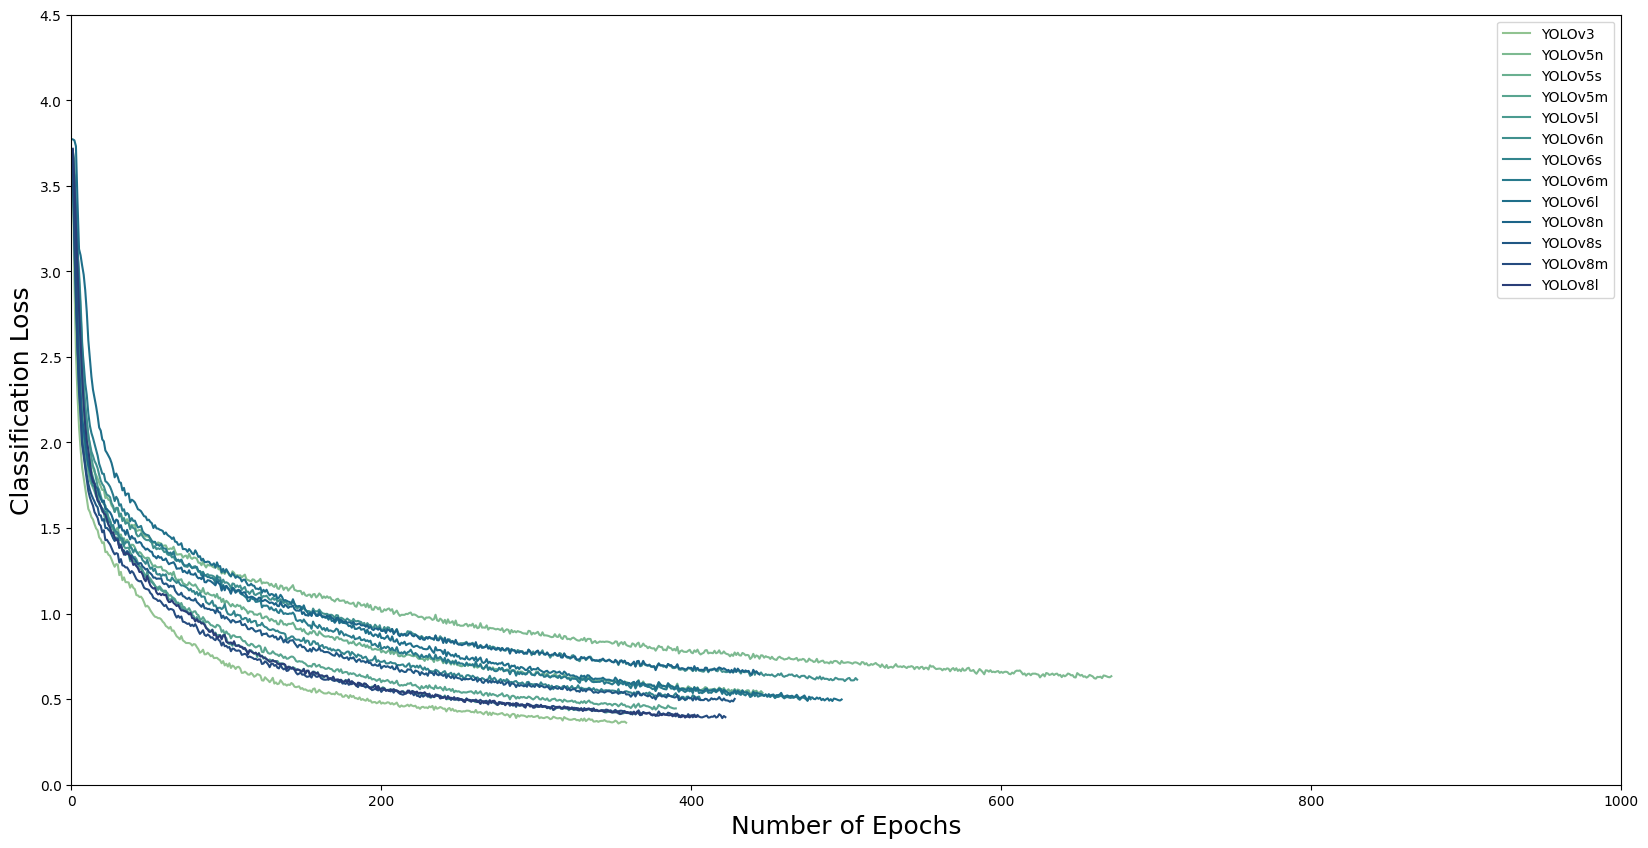

In [21]:
plt.figure(figsize=(20, 10))
colors = sns.color_palette('crest', 13)

sns.lineplot(x="                  epoch", y="         train/cls_loss", data=yolo_v3, color=colors[0], label="YOLOv3")
sns.lineplot(x="                  epoch", y="         train/cls_loss", data=yolo_v5n, color=colors[1], label="YOLOv5n")
sns.lineplot(x="                  epoch", y="         train/cls_loss", data=yolo_v5s, color=colors[2], label="YOLOv5s")
sns.lineplot(x="                  epoch", y="         train/cls_loss", data=yolo_v5m, color=colors[3], label="YOLOv5m")
sns.lineplot(x="                  epoch", y="         train/cls_loss", data=yolo_v5l, color=colors[4], label="YOLOv5l")
sns.lineplot(x="                  epoch", y="         train/cls_loss", data=yolo_v6n, color=colors[5], label="YOLOv6n")
sns.lineplot(x="                  epoch", y="         train/cls_loss", data=yolo_v6s, color=colors[6], label="YOLOv6s")
sns.lineplot(x="                  epoch", y="         train/cls_loss", data=yolo_v6m, color=colors[7], label="YOLOv6m")
sns.lineplot(x="                  epoch", y="         train/cls_loss", data=yolo_v6l, color=colors[8], label="YOLOv6l")
sns.lineplot(x="                  epoch", y="         train/cls_loss", data=yolo_v8n, color=colors[9], label="YOLOv8n")
sns.lineplot(x="                  epoch", y="         train/cls_loss", data=yolo_v8s, color=colors[10], label="YOLOv8s")
sns.lineplot(x="                  epoch", y="         train/cls_loss", data=yolo_v8m, color=colors[11], label="YOLOv8m")
sns.lineplot(x="                  epoch", y="         train/cls_loss", data=yolo_v8l, color=colors[12], label="YOLOv8l")

plt.legend(ncol=1, loc='upper right')
plt.xlim(0, 1000)
plt.ylim(0, 4.5)
plt.xlabel("Number of Epochs", fontsize=18)
plt.ylabel("Classification Loss", fontsize=18)
# plt.savefig("cls_loss_vs_epochs.pdf")
plt.show()

### Plotting the graph Epochs vs Distribution Focal Loss

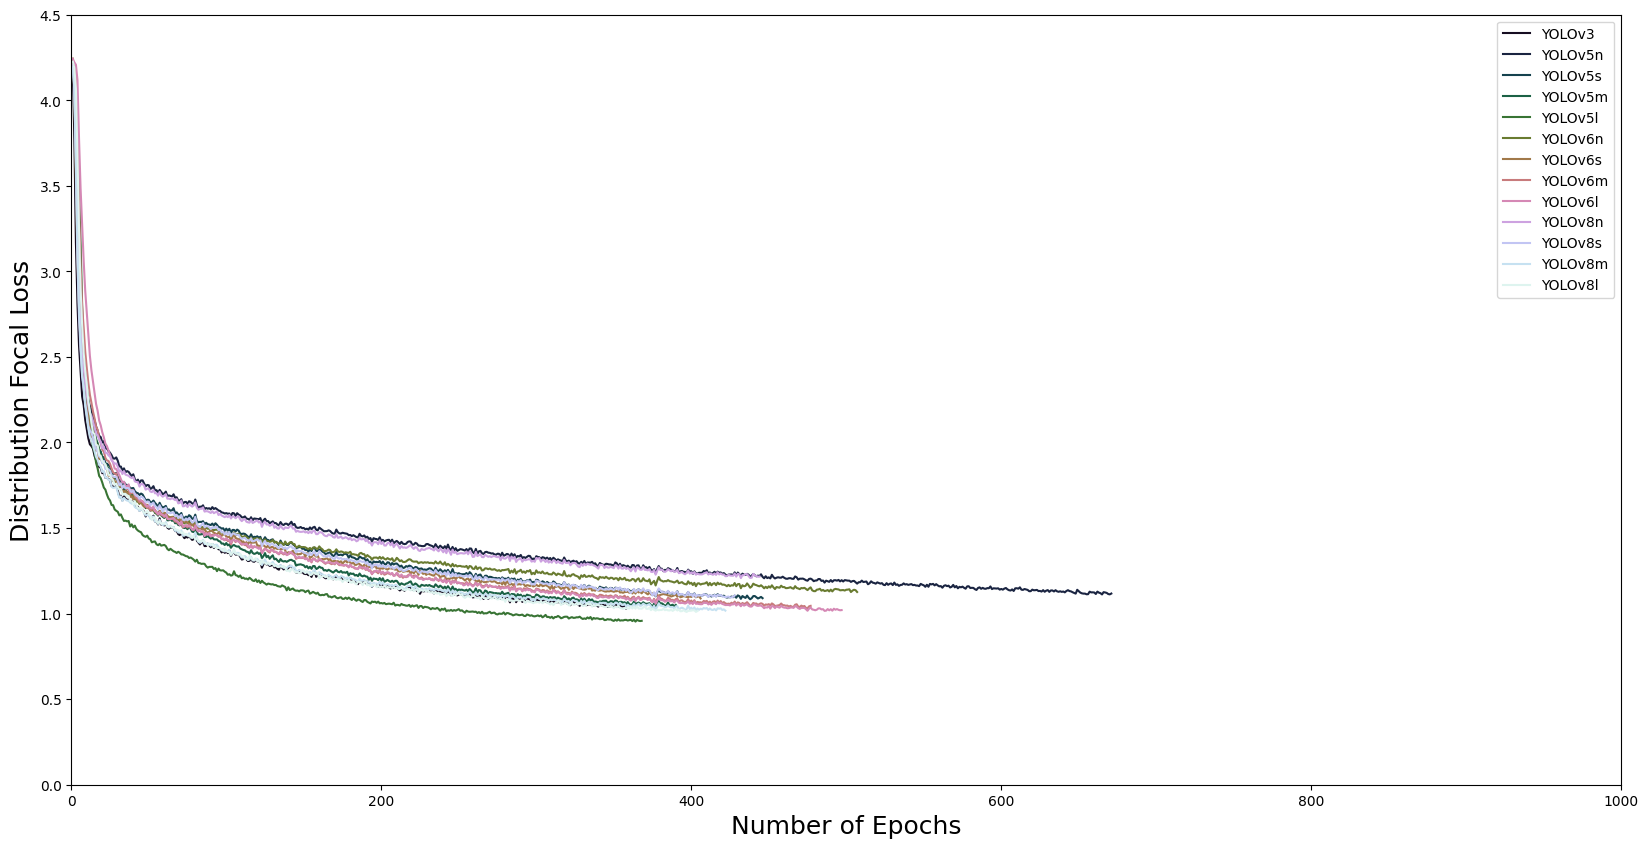

In [22]:
plt.figure(figsize=(20, 10))
colors = sns.color_palette('cubehelix', 13)

sns.lineplot(x="                  epoch", y="         train/dfl_loss", data=yolo_v3, color=colors[0], label="YOLOv3")
sns.lineplot(x="                  epoch", y="         train/dfl_loss", data=yolo_v5n, color=colors[1], label="YOLOv5n")
sns.lineplot(x="                  epoch", y="         train/dfl_loss", data=yolo_v5s, color=colors[2], label="YOLOv5s")
sns.lineplot(x="                  epoch", y="         train/dfl_loss", data=yolo_v5m, color=colors[3], label="YOLOv5m")
sns.lineplot(x="                  epoch", y="         train/dfl_loss", data=yolo_v5l, color=colors[4], label="YOLOv5l")
sns.lineplot(x="                  epoch", y="         train/dfl_loss", data=yolo_v6n, color=colors[5], label="YOLOv6n")
sns.lineplot(x="                  epoch", y="         train/dfl_loss", data=yolo_v6s, color=colors[6], label="YOLOv6s")
sns.lineplot(x="                  epoch", y="         train/dfl_loss", data=yolo_v6m, color=colors[7], label="YOLOv6m")
sns.lineplot(x="                  epoch", y="         train/dfl_loss", data=yolo_v6l, color=colors[8], label="YOLOv6l")
sns.lineplot(x="                  epoch", y="         train/dfl_loss", data=yolo_v8n, color=colors[9], label="YOLOv8n")
sns.lineplot(x="                  epoch", y="         train/dfl_loss", data=yolo_v8s, color=colors[10], label="YOLOv8s")
sns.lineplot(x="                  epoch", y="         train/dfl_loss", data=yolo_v8m, color=colors[11], label="YOLOv8m")
sns.lineplot(x="                  epoch", y="         train/dfl_loss", data=yolo_v8l, color=colors[12], label="YOLOv8l")

plt.legend(ncol=1, loc='upper right')
plt.xlim(0, 1000)
plt.ylim(0, 4.5)
plt.xlabel("Number of Epochs", fontsize=18)
plt.ylabel("Distribution Focal Loss", fontsize=18)
# plt.savefig("dfl_loss_vs_epochs.pdf")
plt.show()